In [1]:
import time, cv2, os, sys
sys.path.append('..')
import numpy as np
import tensorflow as tf
from utils import *
from deblurring_fcn import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:

tmp = np.load('/data1/jerry/project/deblurring/data_128_easy_5_edit.npz')

img = tmp['data']
lab = tmp['label']
#shuf_seq = np.random.choice(len(img), len(img), replace=False)
th = int(len(img)*0.8)
img = np.reshape(img, [img.shape[0], img.shape[1], img.shape[2], 1])
tr_img = img[:th]
te_img = img[th:]

lab = np.reshape(lab, [lab.shape[0], lab.shape[1], lab.shape[2], 1])
tr_lab = lab[:th]
te_lab = lab[th:]

del tmp, img

print('Input Size : %s'%str(tr_img.shape))
print('Label Size : %s'%str(tr_lab.shape))

print('Input Size : %s'%str(te_img.shape))
print('Label Size : %s'%str(te_lab.shape))


Input Size : (2870, 128, 128, 1)
Label Size : (2870, 128, 128, 1)
Input Size : (718, 128, 128, 1)
Label Size : (718, 128, 128, 1)


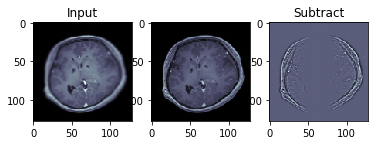

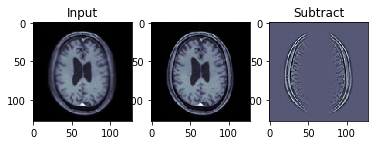

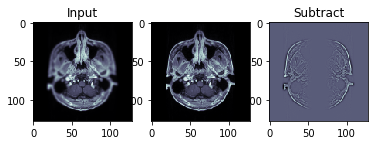

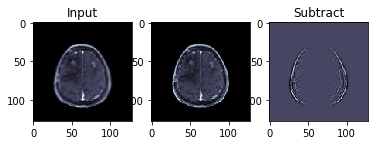

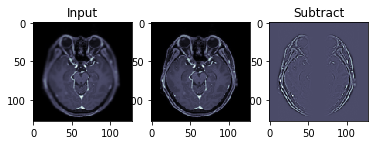

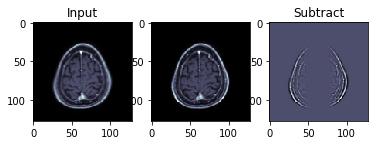

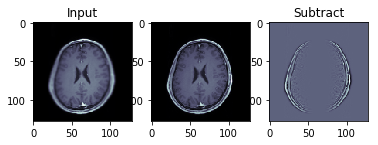

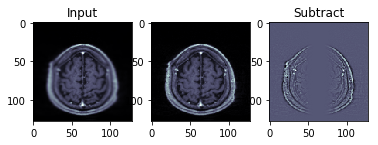

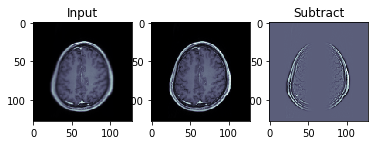

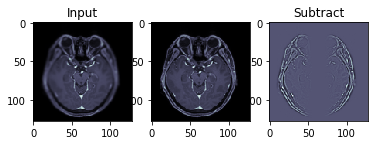

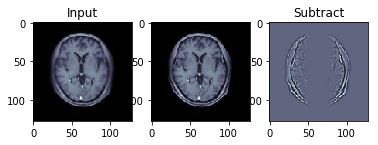

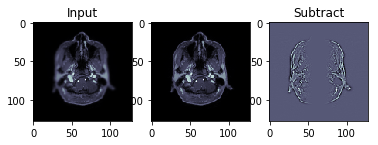

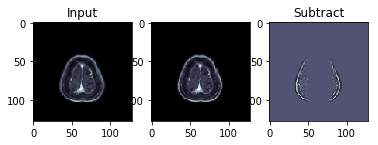

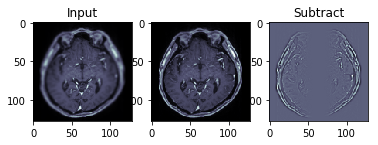

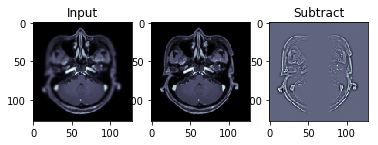

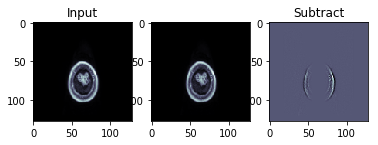

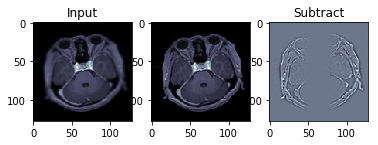

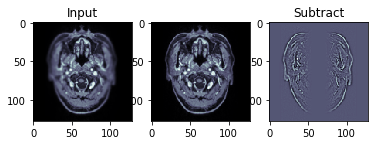

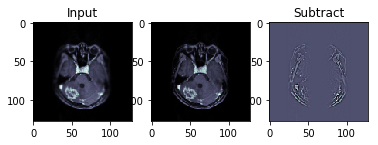

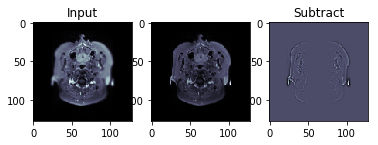

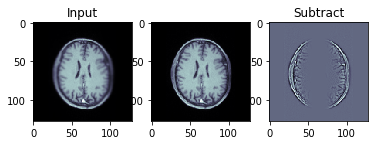

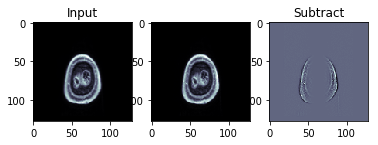

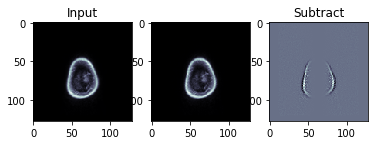

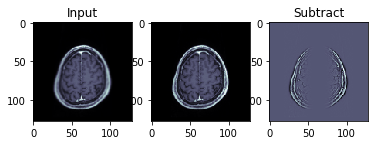

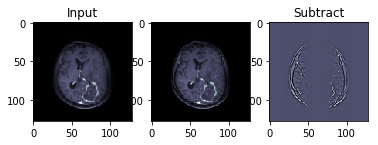

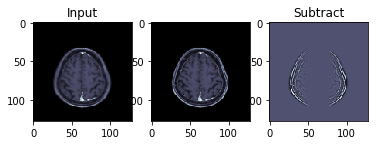

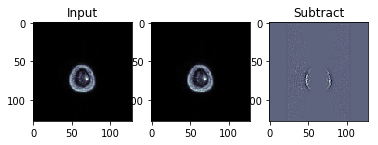

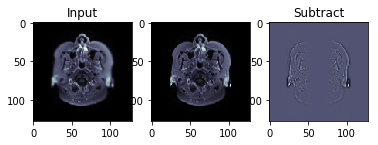

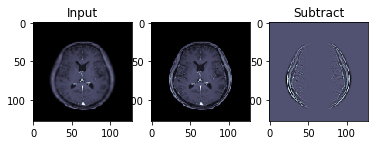

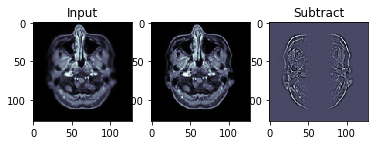

In [3]:
for num in np.random.choice(len(te_lab), 30, replace=False):
    plt.figure(figsize=(6,6))
    plt.subplot(131)
    plt.title("Input")
    plt.imshow(te_img[num, :,:, 0], cmap=plt.cm.bone)
    plt.subplot(132)
    plt.imshow(te_lab[num,:,:,0], cmap=plt.cm.bone)
    plt.subplot(133)
    plt.title("Subtract")
    plt.imshow(te_lab[num,:,:,0]-te_img[num,:,:,0], cmap=plt.cm.bone)
    plt.show()

In [4]:
with tf.Session() as sess:
    deblur = Model(sess, "deblur", 128, 0.0001)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.restore(sess, '/data1/jerry/project/deblurring/checkpoint/deblurring_fcn_gauss/128/gaussian_edit_5')
    asd = deblur.predict(te_img)

INFO:tensorflow:Restoring parameters from /data1/jerry/project/deblurring/checkpoint/deblurring_fcn_gauss/128/gaussian_edit_5


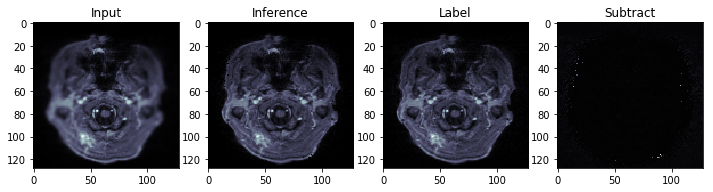

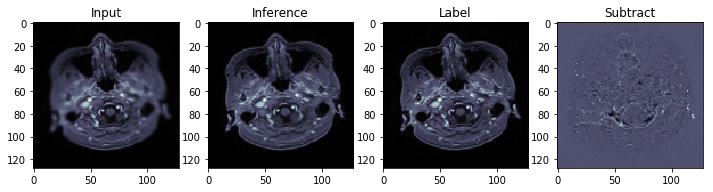

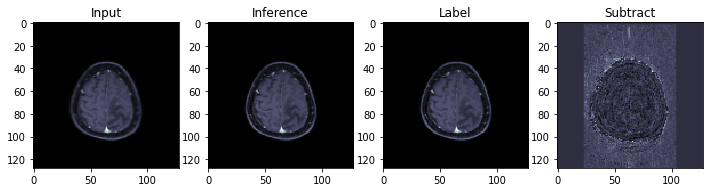

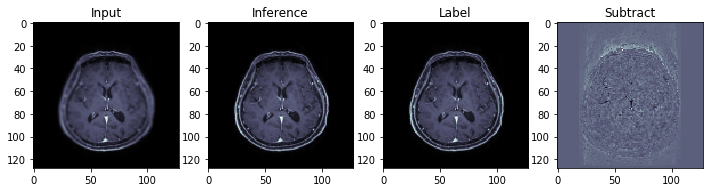

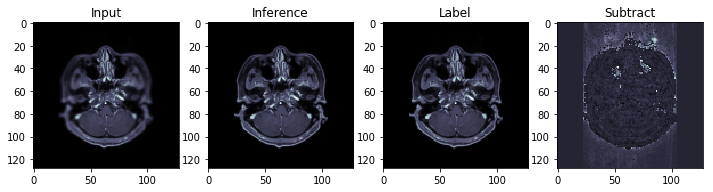

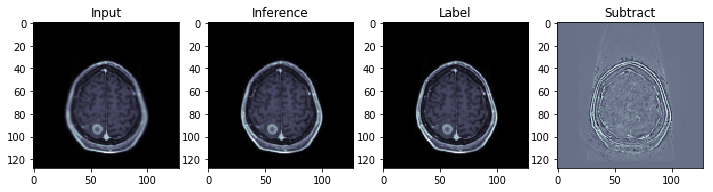

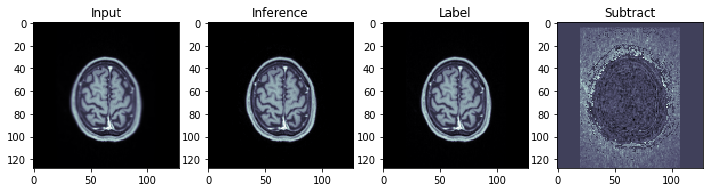

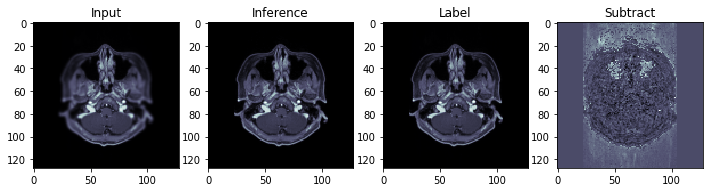

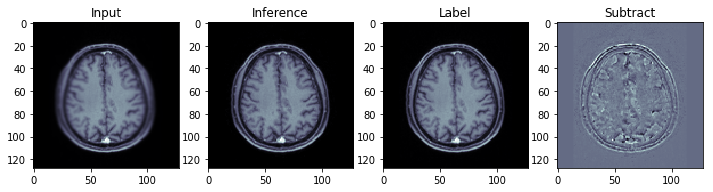

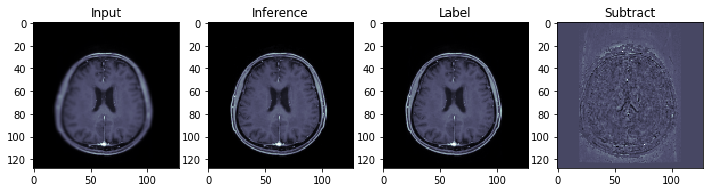

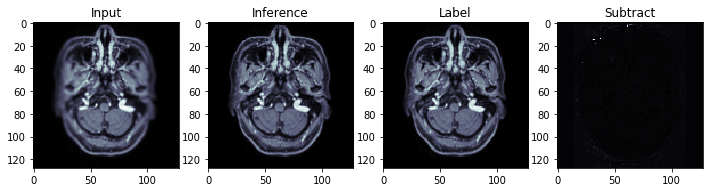

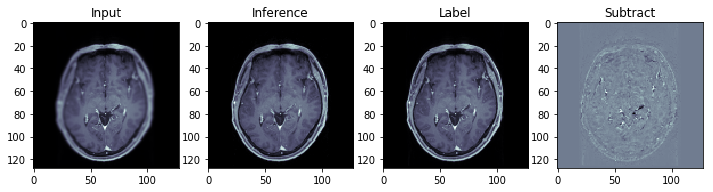

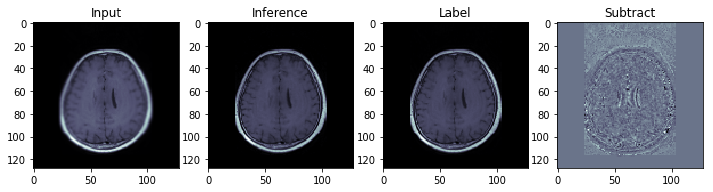

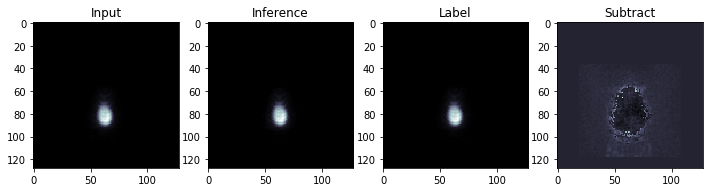

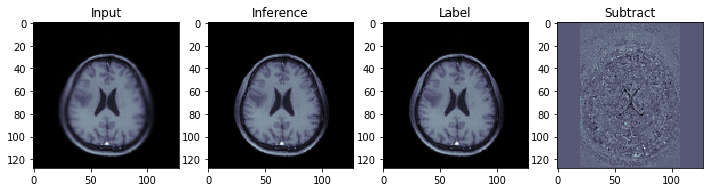

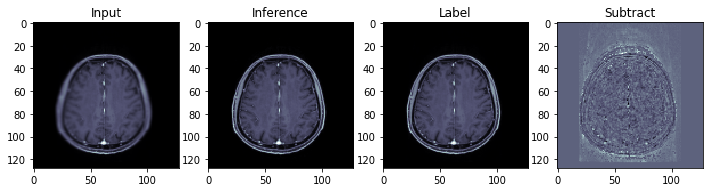

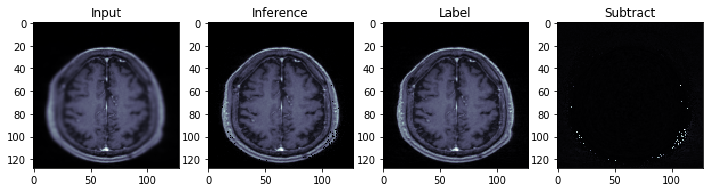

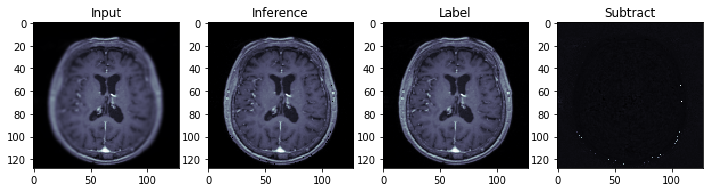

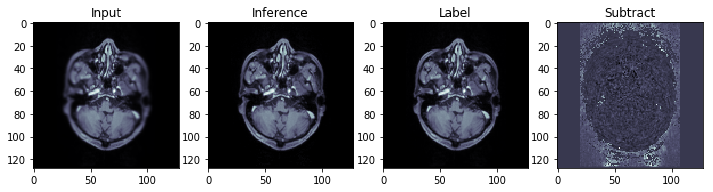

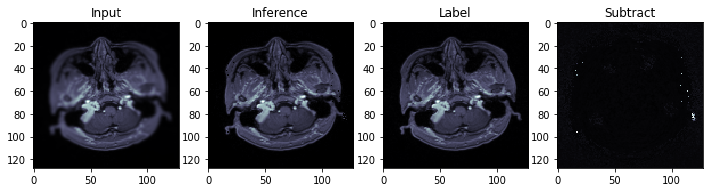

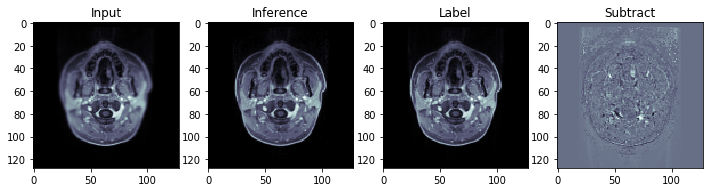

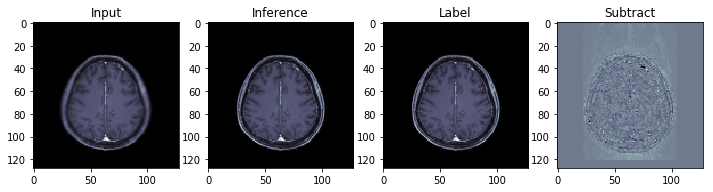

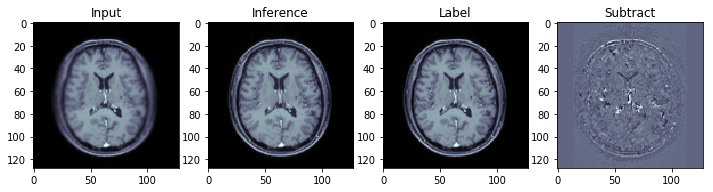

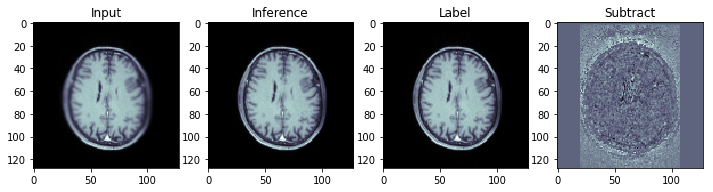

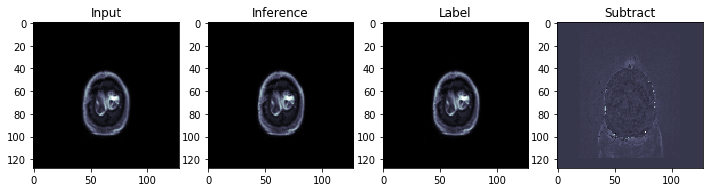

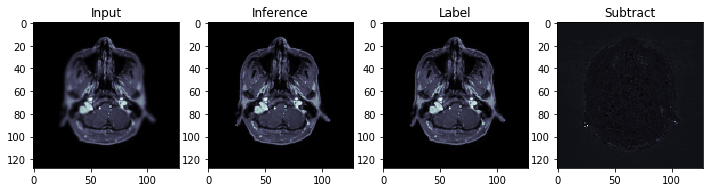

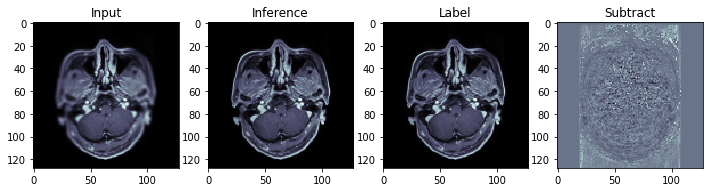

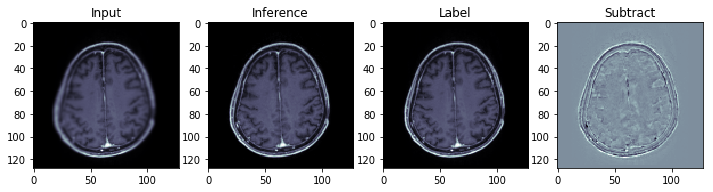

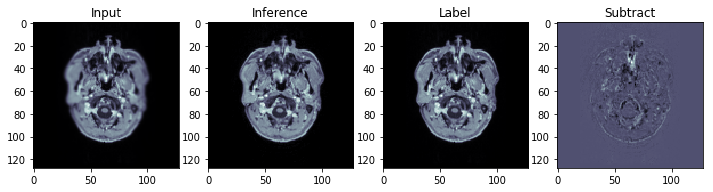

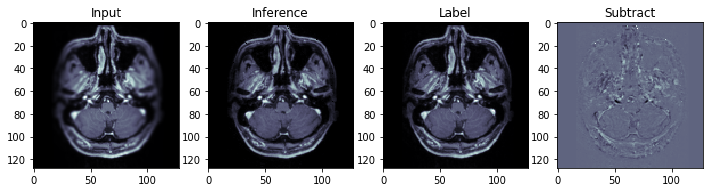

In [5]:
for num in np.random.choice(len(asd), 30, replace=False):
    plt.figure(figsize=(12,8))
    plt.subplot(141)
    plt.title("Input")
    plt.imshow(te_img[num, :,:, 0], cmap=plt.cm.bone)
    plt.subplot(142)
    plt.title("Inference")
    plt.imshow(asd[num,:,:,0], cmap=plt.cm.bone)
    plt.subplot(143)
    plt.title("Label")
    plt.imshow(te_lab[num,:,:,0], cmap=plt.cm.bone)
    plt.subplot(144)
    plt.title("Subtract")
    plt.imshow(te_lab[num,:,:,0]-asd[num,:,:,0], cmap=plt.cm.bone)
    plt.show()